In [18]:
!pip3 install reynir

In [19]:
import pandas as pd

df = pd.read_csv('./data/is.tsv', sep='\t')

In [20]:
df.head()

,word,valence,arousal,dominance,joy,anger,sadness,fear,disgust
0,jarðbark,4.90,4.20,5.01,1.89,1.63,1.57,1.66,1.62
1,abalone,5.10,4.22,5.20,1.96,1.58,1.50,1.57,1.62
2,láta af,3.85,4.32,4.55,1.29,2.21,2.16,2.18,2.24
3,brottfall,3.10,4.59,3.80,1.27,2.30,2.29,2.38,2.22
4,abbey,4.90,4.20,5.01,1.89,1.63,1.57,1.66,1.62


<BarContainer object of 8 artists>

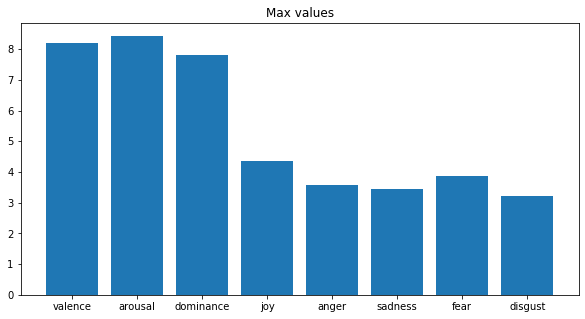

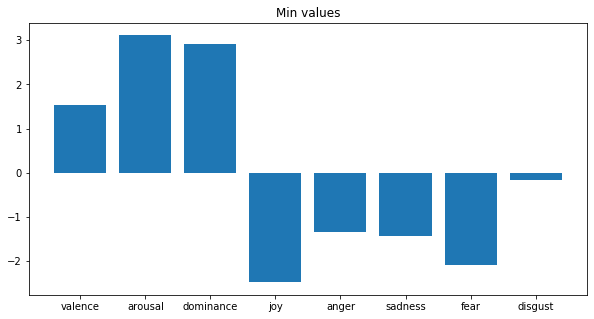

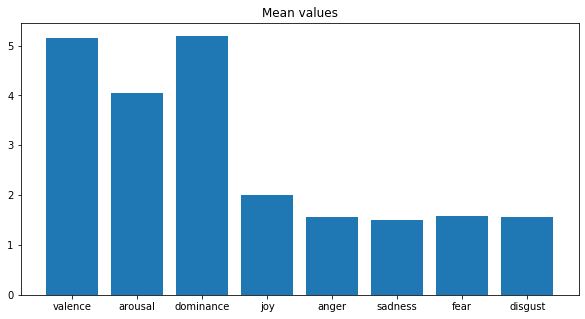

In [21]:
from matplotlib import pyplot as plt

# max min values
columns = df.columns[1:]
average_from_each_column = [df[column].mean() for column in columns]

plt.figure(figsize=(10, 5))
plt.title('Max values')
plt.bar(columns, [df[column].max() for column in columns])

plt.figure(figsize=(10, 5))
plt.title('Min values')
plt.bar(columns, [df[column].min() for column in columns])

plt.figure(figsize=(10, 5))
plt.title('Mean values')
plt.bar(columns, [df[column].mean() for column in columns])

In [22]:
# sort by largest value
columns = df.columns[1:]

for column in columns:
    print(column)
    print([str(word) for word in df.sort_values(by=column, ascending=False)[:10]['word']])
    

valence
['Do', 'njóttu', 'Be', 'Te', 'Ást', 'EA', 'Matur', 'Go', 'Rosa', 'vinátta']
arousal
['Ray', 'myrt', 'myrtur', 'glæpa', 'smita', 'morða', 'dóu', 'gruns', 'innrás', 'glæpi']
dominance
['Do', 'Be', 'EA', 'Go', 'We', 'Te', 'Us', 'Up', 'MW', '\ue926']
joy
['afa', 'takk', 'slökun', 'Verð', 'lilja', 'kærasta', 'Þakka', 'ódýrt', 'ströndina', 'fagna']
anger
['rán', 'glæpi', 'smit', 'nauðgari', 'myrtir', 'nauðgað', 'myrtur', 'ISIS', 'myrti', 'óvinur']
sadness
['rán', 'glæpi', 'myrtur', 'nauðgari', 'myrtir', 'nauðgað', 'smit', 'myrti', 'ISIS', 'manndráp']
fear
['rán', 'glæpi', 'myrtur', 'myrtir', 'myrti', 'ISIS', 'smit', 'nauðgari', 'nauðgað', 'glæpir']
disgust
['rán', 'smit', 'glæpi', 'nauðgari', 'óvinur', 'rúst', 'nauðgað', 'saur', 'refsað', 'prófastur']


In [23]:
# search for a word
query = "a"
score = df.query('word == @query').values[0][1:].tolist()

print(df.columns[1:].tolist())
print(score)

['valence', 'arousal', 'dominance', 'joy', 'anger', 'sadness', 'fear', 'disgust']
[4.96, 3.82, 5.2, 1.84, 1.44, 1.38, 1.46, 1.44]


In [1]:
from datasets import load_dataset
ds = load_dataset("stanfordnlp/imdb")

/home/haukur/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


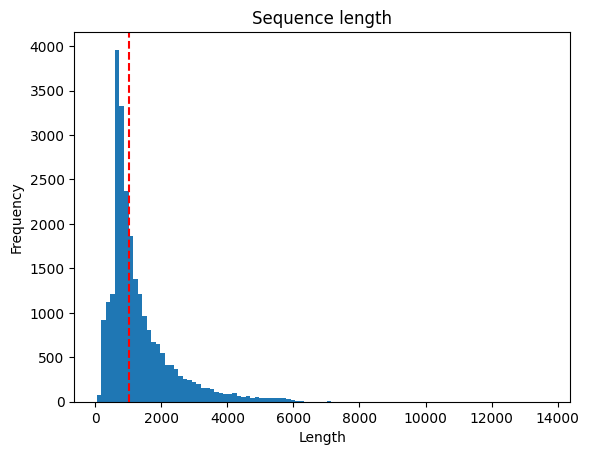

In [10]:
from matplotlib import pyplot as plt

def hist_plot(ds, max_seq_len=None):
    seq_len = [len(x) for x in ds['train']['text']]
    plt.hist(seq_len, bins=100)

    if max_seq_len:
        plt.axvline(x=max_seq_len, color='r', linestyle='--')

    plt.title('Sequence length')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

hist_plot(ds, max_seq_len=1024)

In [18]:
# loop over the dataset, split on max_seq_len, copy the label
from tqdm import tqdm
import pandas as pd
from datasets import Dataset

def split_text(text, max_seq_len):
    return [text[i:i + max_seq_len] for i in range(0, len(text), max_seq_len)]

def split_dataset(dataset, max_seq_len):
    new_dataset = []
    for i in tqdm(range(len(dataset))):
        text = dataset[i]['text']
        label = dataset[i]['label']
        for part in split_text(text, max_seq_len):
            new_dataset.append({'text': part, 'label': label})
    return new_dataset

new_train = split_dataset(ds['train'], 1024)
new_train = pd.DataFrame(new_train)
new_train = Dataset.from_pandas(new_train)
new_train.take(5)

100%|██████████| 25000/25000 [00:00<00:00, 27886.44it/s]


Dataset({
    features: ['text', 'label'],
    num_rows: 5
})

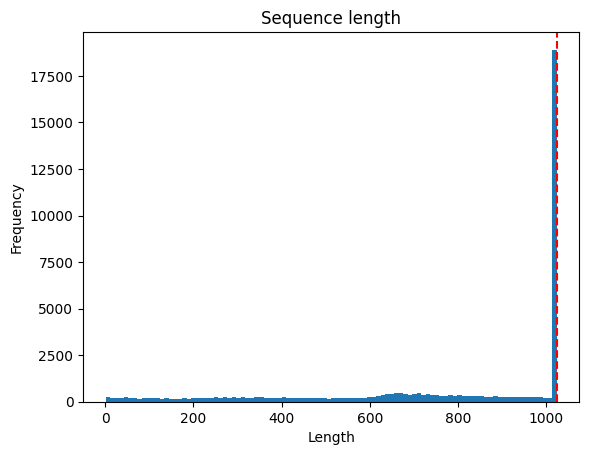

In [20]:
hist_plot({"train": new_train}, max_seq_len=1024)